In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding for multi-class classification
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

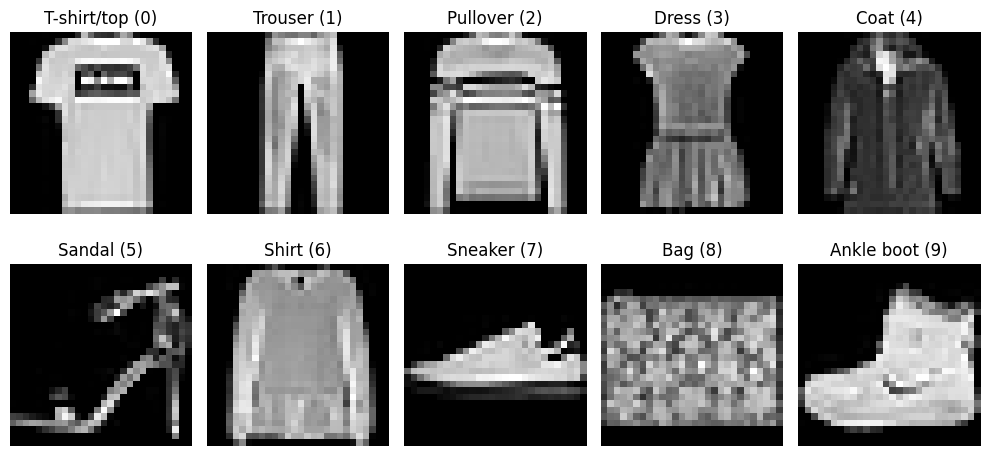

In [20]:
# Fashion MNIST label names
label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Create a figure for the matrix form (2x5 grid)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Get the unique labels (0-9) and an example for each
unique_labels = np.unique(y_train)
examples = []

for label in unique_labels:
    # Find the index of the first occurrence of each label
    idx = np.where(y_train == label)[0][0]
    examples.append((X_train[idx], label))

# Plot each example in the grid
for i, ax in enumerate(axes.flat):
    img, label = examples[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{label_names[label]} ({label})")
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

In [11]:
# Build a simple logistic regression model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to 784-dim vector
    Dense(10, activation='softmax')  # 10 classes with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))

Epoch 1/10
  17/1875 [..............................] - ETA: 6s - loss: 2.0361 - accuracy: 0.2960  

2024-09-26 19:33:44.922068: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6034 - accuracy: 0.7967 - val_loss: 0.5058 - val_accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4631 - accuracy: 0.8409 - val_loss: 0.4776 - val_accuracy: 0.8345
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4356 - accuracy: 0.8504 - val_loss: 0.4628 - val_accuracy: 0.8391
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4224 - accuracy: 0.8539 - val_loss: 0.4627 - val_accuracy: 0.8361
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4130 - accuracy: 0.8566 - val_loss: 0.4518 - val_accuracy: 0.8410
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4076 - accuracy: 0.8592 - val_loss: 0.4454 - val_accuracy: 0.8440
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4028 - accuracy: 0.8599 - val_loss: 0.4429 - val_accuracy: 0.8453
Epo

313/313 [==============================] - 1s 4ms/step - loss: 0.4568 - accuracy: 0.8370
Test Accuracy: 83.70%


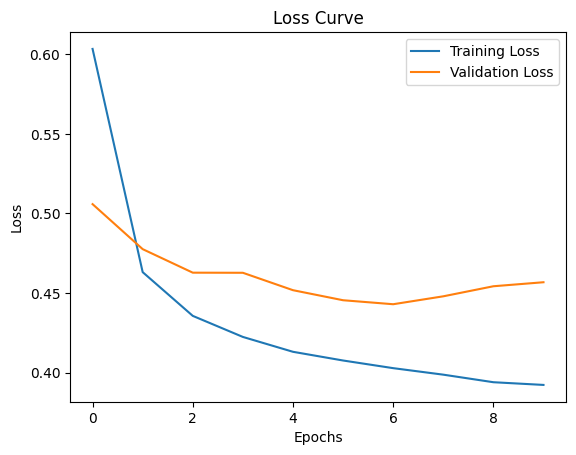

In [12]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
fashion_mnist_classes = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]
# Generate classification report and confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=fashion_mnist_classes))
print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.76      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.71      0.75      0.73      1000
       Dress       0.80      0.89      0.85      1000
        Coat       0.80      0.60      0.69      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.55      0.67      0.60      1000
     Sneaker       0.90      0.95      0.93      1000
         Bag       0.95      0.94      0.94      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[764   1  11  63   4   0 146   0  11   0]
 [  3 948   4  34   4   0   5   0   2   0]
 [ 15   4 746  10  74   1 141   0   9   0]
 [ 15   6  13 891  18   0  54   0   3   0]
 [  0   0 159 

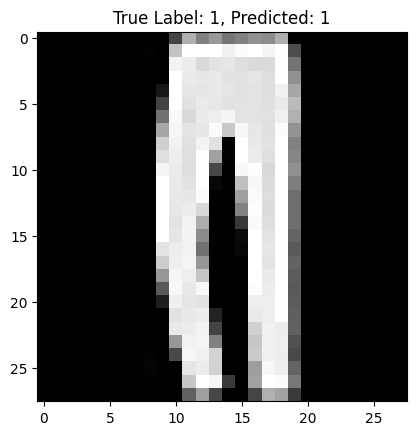

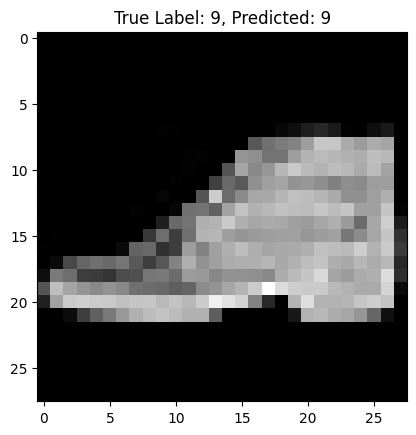

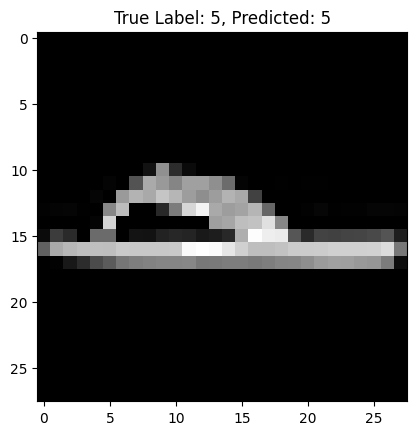

In [18]:
# Show some example predictions
for i in [2,456,567]:
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True Label: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.show()